In [3]:
import os
import cv2

# the input and output directories
input_dir = "/kaggle/input/tmlc-dataset/Annotated_Data for cropping"
output_dir = "/kaggle/working/cropped_dataset"

#  the output directory 
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through all the files in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image
    if filename.endswith(".JPG"):
        # Load image
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Get the corresponding .txt file
        txt_filename = os.path.splitext(filename)[0] + ".txt"
        txt_path = os.path.join(input_dir, txt_filename)

        # Read the bounding box coordinates from the .txt file
        with open(txt_path, "r") as f:
            lines = f.readlines()
            for line in lines:
                # Split the line by whitespace
                parts = line.strip().split()
                
                # Check if the line contains exactly 5 parts (class_id + 4 coordinates)
                if len(parts) == 5:
                    class_id, x, y, w, h = map(float, parts)
                    x1 = int((float(x) - float(w) / 2) * image.shape[1])
                    y1 = int((float(y) - float(h) / 2) * image.shape[0])
                    x2 = int((float(x) + float(w) / 2) * image.shape[1])
                    y2 = int((float(y) + float(h) / 2) * image.shape[0])

                    # Crop the image based on the bounding box coordinates
                    cropped_image = image[y1:y2, x1:x2]

                    # Save the cropped image in the output directory
                    output_path = os.path.join(output_dir, filename)
                    cv2.imwrite(output_path, cropped_image)
                else:
                    print(f"Skipping line: {line}")

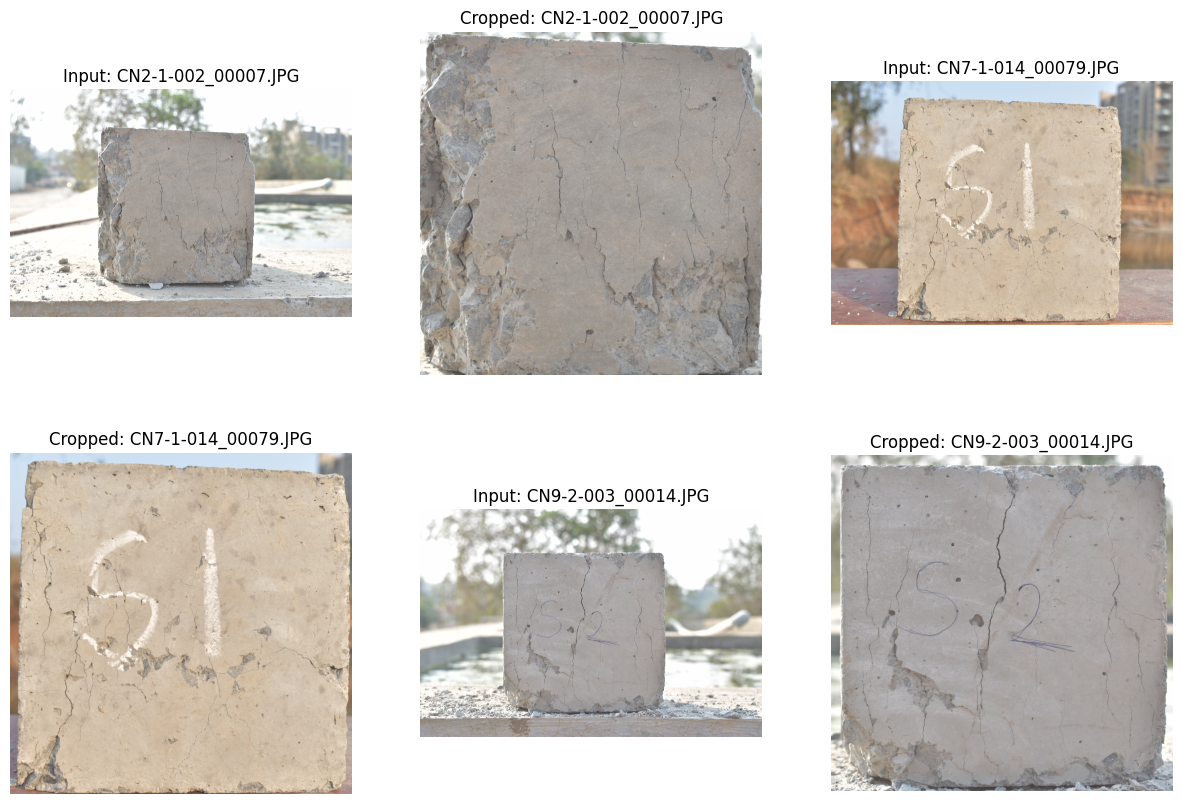

In [11]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Set the paths to the input and cropped datasets
input_dataset_path = '/kaggle/input/tmlc-dataset/Annotated_Data for cropping'
cropped_dataset_path = '/kaggle/working/cropped_dataset'

# Get a list of all image files in the input dataset
image_files = [f for f in os.listdir(input_dataset_path) if f.endswith('.JPG')]

# Randomly selects 3 images
selected_images = random.sample(image_files, 3)

# Create a figure to display the images
plt.figure(figsize=(15, 10))

for i, img_file in enumerate(selected_images):
    # Load the image from the input dataset using OpenCV
    input_img_path = os.path.join(input_dataset_path, img_file)
    input_image = cv2.imread(input_img_path)
    
    # Convert BGR to RGB 
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    
    # Load the corresponding cropped image
    cropped_img_path = os.path.join(cropped_dataset_path, img_file)
    cropped_image = cv2.imread(cropped_img_path)
    
    # Convert BGR to RGB (OpenCV loads images in BGR format)
    cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    
    # Display the input and cropped images side by side
    plt.subplot(2, 3, 2 * i + 1)
    plt.imshow(input_image)
    plt.axis('off')  # Hide axis
    plt.title(f"Input: {img_file}")
    
    plt.subplot(2, 3, 2 * i + 2)
    plt.imshow(cropped_image)
    plt.axis('off')  # Hide axis
    plt.title(f"Cropped: {img_file}")

plt.show()

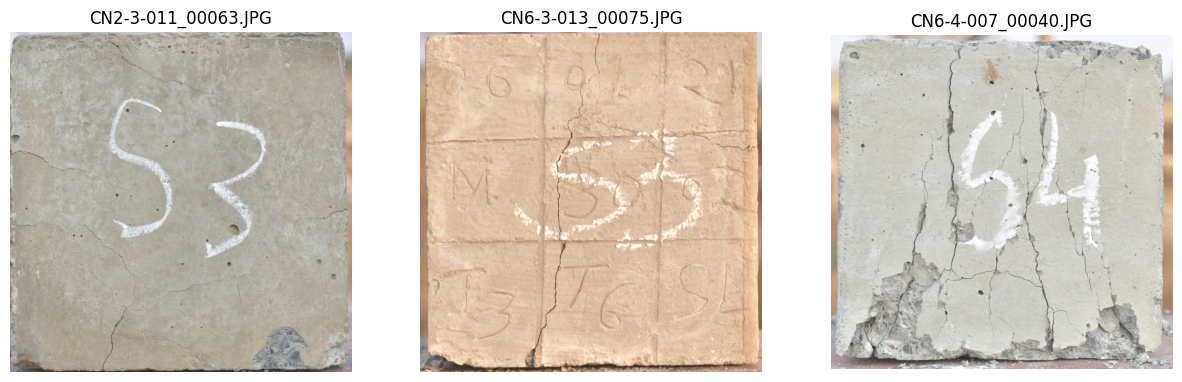

In [4]:
# Set the path to the cropped dataset
cropped_dataset_path = '/kaggle/working/cropped_dataset'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(cropped_dataset_path) if f.endswith('.JPG')]

# Randomly select 3 images
selected_images = random.sample(image_files, 3)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

for i, img_file in enumerate(selected_images):
    # Load the image using OpenCV
    img_path = os.path.join(cropped_dataset_path, img_file)
    image = cv2.imread(img_path)
    
    # Convert BGR to RGB (OpenCV loads images in BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.title(img_file)

plt.show()